<h1 align = 'center'><B><U>CSCN8000</U> - <U>Artficial Intelligence Algorithm</U></B></h1>
<h2 align = 'center'><B><U>Assignment</U> - <U>2</U></B></h2>
<h3 align = 'center'><B><I>Waseem Iqbal Shaikh(8902834)</I></B></h3>

- Importing the neccessary packages:

In [141]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

- Loading the dataset:

In [142]:
df = pd.read_csv("heart.csv")
df.head(5)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


- Checking for missing values:

In [143]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

- Checking for Outliers:

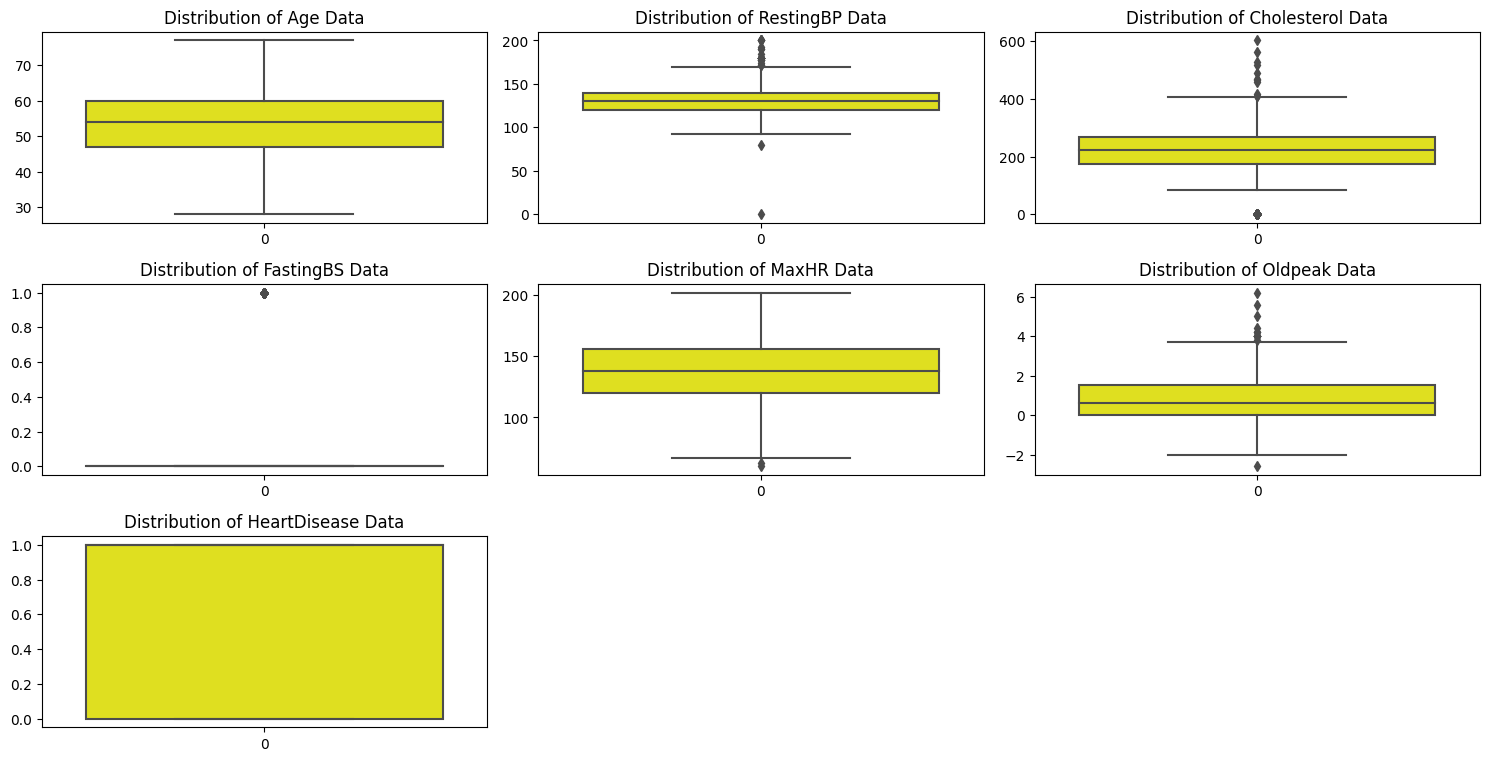

In [144]:
plt.figure(figsize=(15,10))
df_num = df.select_dtypes(include=['float64', 'int64'])
for i,col in enumerate(df_num.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.boxplot(df_num[col], color='Yellow')
    plt.tight_layout()
    plt.plot()

- Removing Outliers using Mean, Median and Z-score:

In [145]:
def remove_outliers(dataframe, columns):
    for col in columns:
        mean = dataframe[col].mean()
        median = dataframe[col].median()
        std_dev = dataframe[col].std()
        lower_bound_mean = mean - 2 * std_dev
        upper_bound_mean = mean + 2 * std_dev
        lower_bound_median = median - 2 * std_dev
        upper_bound_median = median + 2 * std_dev
        
        dataframe[col] = np.where((dataframe[col] < lower_bound_mean) | (dataframe[col] > upper_bound_mean), median, dataframe[col])
        dataframe[col] = np.where((dataframe[col] < lower_bound_median) | (dataframe[col] > upper_bound_median), median, dataframe[col])
        
        # Using Z-score method
        z_scores = np.abs((dataframe[col] - mean) / std_dev)
        dataframe[col] = np.where(z_scores > 2, median, dataframe[col])
    return dataframe

# Step 3: Apply outlier removal on numerical columns
numerical_columns = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]
df = remove_outliers(df, numerical_columns)

- Data after removing Outliers:

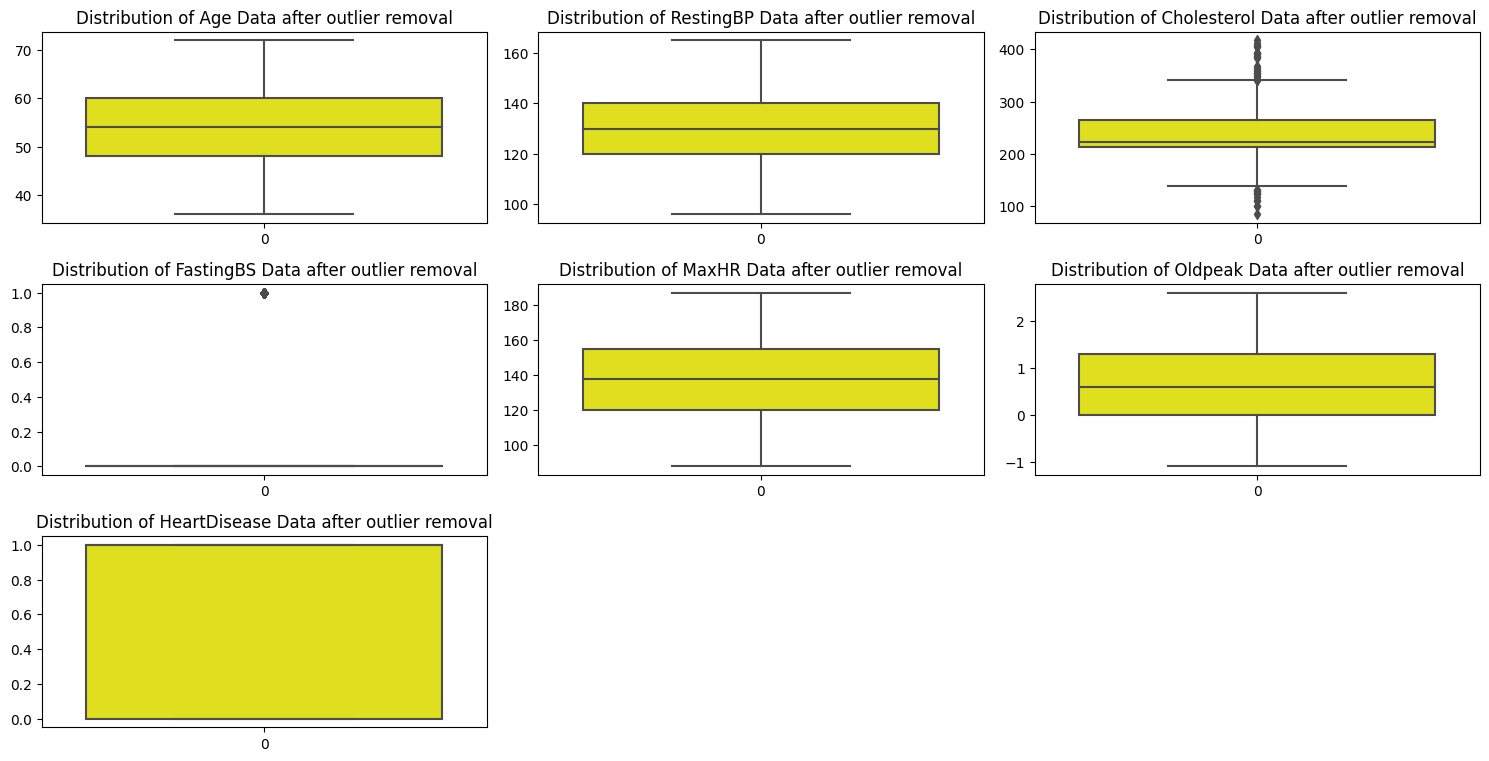

In [146]:
# box plot for the dataset after outlier removal
plt.figure(figsize=(15,10))
df_num = df.select_dtypes(include=['float64', 'int64'])
for i,col in enumerate(df_num.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data after outlier removal")
    sns.boxplot(df_num[col], color='yellow')
    plt.tight_layout()
    plt.plot()

- Converting text columns to numbers using label encoding and one-hot encoding:

In [147]:
def encode_categorical_columns(dataframe, columns_to_label_encode, columns_to_onehot_encode):
    le = LabelEncoder()
    for col in columns_to_label_encode:
        dataframe[col] = le.fit_transform(dataframe[col])
        
    dataframe = pd.get_dummies(dataframe, columns=columns_to_onehot_encode, drop_first=True)
    return dataframe

columns_to_label_encode = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]
columns_to_onehot_encode = ["ChestPainType", "RestingECG", "ST_Slope"]

df = encode_categorical_columns(df, columns_to_label_encode, columns_to_onehot_encode)


- Applying scaling to the numerical features:

In [148]:
# Step 5: Apply scaling to the numerical features
def apply_scaling(dataframe, columns_to_scale):
    scaler = StandardScaler()
    dataframe[columns_to_scale] = scaler.fit_transform(dataframe[columns_to_scale])
    return dataframe

columns_to_scale = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]
df = apply_scaling(df, columns_to_scale)

- Building a machine learning classification model using Support Vector Machine (SVM):

In [149]:
X = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 10: Build and evaluate the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)

print("SVM Accuracy:", svm_accuracy)

SVM Accuracy: 0.8478260869565217


- Demonstrating the standalone SVM model and Bagging model and compare their performance:

In [150]:
svm_bagging_model = BaggingClassifier(base_estimator=SVC(kernel='linear'), n_estimators=10, random_state=42)
svm_bagging_model.fit(X_train, y_train)
svm_bagging_predictions = svm_bagging_model.predict(X_test)
svm_bagging_accuracy = accuracy_score(y_test, svm_bagging_predictions)

print("Bagging SVM Accuracy:", svm_bagging_accuracy)


Bagging SVM Accuracy: 0.8315217391304348


d:\Conestoga\FML\git_projects\CSCN8010\venv\CSCN8010_classic_ml\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


- Building a machine learning classification model using Decision Tree Classifier:

In [151]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)

print("Decision Tree Accuracy:", dt_accuracy)

Decision Tree Accuracy: 0.8043478260869565


- Demonstrating the standalone Decision Tree model and Bagging model and comparing their performance:

In [152]:
dt_bagging_model = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42), n_estimators=10, random_state=42)
dt_bagging_model.fit(X_train, y_train)
dt_bagging_predictions = dt_bagging_model.predict(X_test)
dt_bagging_accuracy = accuracy_score(y_test, dt_bagging_predictions)

print("Bagging Decision Tree Accuracy:", dt_bagging_accuracy)

Bagging Decision Tree Accuracy: 0.8097826086956522


d:\Conestoga\FML\git_projects\CSCN8010\venv\CSCN8010_classic_ml\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


### Comparing the performance of SVM and Decision Tree Classifier:



 - Model for a Support Vector Machine (SVM):<br>
Precision: 84.78%<br>
Among standalone models, SVM fared the best and had the highest accuracy (84.78%). SVM is a potent classifier that works with a variety of data types.


- Model for Decision Making:<br>
Reliability: 80.43%<br>
A simple and understandable model, Decision Tree attained an accuracy of 80.43%, but it was less accurate than SVM.


- SVM Bagging Model:<br>
Precision: 83.15%<br>
Combining numerous SVM instances and minimising overfitting allowed bagging to increase SVM's accuracy (83.15%).

- Decision-tree model for bagging:<br>
Precision: 80.98%<br>
Bagging improved model stability and performance by increasing Decision Tree accuracy (80.98%).

### In conclusion: SVM outperformed Decision Tree in terms of overall performance, whereas bagging increased accuracy for both models, particularly for the Decision Tree model. For this objective of predicting cardiac disease, SVM continues to be the best option. Model performance can be improved through additional optimisation and assessment.

